<a href="https://colab.research.google.com/github/cheikh19/DaxStudio/blob/master/ventes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importer les packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#Collecter les noms des fichiers (datasets)
Files=[file for file in os.listdir(r"/content/drive/MyDrive/ventes")]

In [8]:
for file in Files:
  print(file)

Sales_July_2019.csv
Sales_November_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv
Sales_March_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_May_2019.csv
Sales_August_2019.csv
all_data.csv


In [9]:
path=r"/content/drive/MyDrive/ventes"

#Crée une base de donnée vide
all_data=pd.DataFrame()
for file in Files:
  current_data=pd.read_csv(path+'/'+file)
  all_data=pd.concat([all_data, current_data])
print(all_data)

       Order ID                     Product Quantity Ordered Price Each  \
0        222910    Apple Airpods Headphones                1        150   
1        222911               Flatscreen TV                1        300   
2        222912       AA Batteries (4-pack)                1       3.84   
3        222913       AA Batteries (4-pack)                1       3.84   
4        222914      AAA Batteries (4-pack)                5       2.99   
...         ...                         ...              ...        ...   
373695   248146  Bose SoundSport Headphones                1      99.99   
373696   248147      AAA Batteries (4-pack)                3       2.99   
373697   248148       AA Batteries (4-pack)                1       3.84   
373698   248149        USB-C Charging Cable                1      11.95   
373699   248150       AA Batteries (4-pack)                1       3.84   

            Order Date                         Purchase Address  
0       07/26/19 16:51          3

In [10]:
#Les données de Janvier
données_janvier=pd.read_csv(path+'/Sales_January_2019.csv')
print(données_janvier)


     Order ID                   Product Quantity Ordered Price Each  \
0      141234                    iPhone                1        700   
1      141235  Lightning Charging Cable                1      14.95   
2      141236          Wired Headphones                2      11.99   
3      141237          27in FHD Monitor                1     149.99   
4      141238          Wired Headphones                1      11.99   
...       ...                       ...              ...        ...   
9718   150497              20in Monitor                1     109.99   
9719   150498          27in FHD Monitor                1     149.99   
9720   150499           ThinkPad Laptop                1     999.99   
9721   150500    AAA Batteries (4-pack)                2       2.99   
9722   150501              Google Phone                1        600   

          Order Date                       Purchase Address  
0     01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1     01/28/19 14:15   

In [11]:
# Les mettre dans un seul fichier csv
all_data.to_csv(path+'/all_data.csv', index=False)

In [12]:
from pandas.core.dtypes import dtypes
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [13]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [14]:
#Déterminer les valeurs manquantes
all_data.isnull().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

In [15]:
#Supprimer les valeurs manquantes
all_data=all_data.dropna(how='all')
print(all_data)

       Order ID                     Product Quantity Ordered Price Each  \
0        222910    Apple Airpods Headphones                1        150   
1        222911               Flatscreen TV                1        300   
2        222912       AA Batteries (4-pack)                1       3.84   
3        222913       AA Batteries (4-pack)                1       3.84   
4        222914      AAA Batteries (4-pack)                5       2.99   
...         ...                         ...              ...        ...   
373695   248146  Bose SoundSport Headphones                1      99.99   
373696   248147      AAA Batteries (4-pack)                3       2.99   
373697   248148       AA Batteries (4-pack)                1       3.84   
373698   248149        USB-C Charging Cable                1      11.95   
373699   248150       AA Batteries (4-pack)                1       3.84   

            Order Date                         Purchase Address  
0       07/26/19 16:51          3

**Quel est le mois durant lequel, nous avons réalisé le meilleur chiffre d'affaire**

In [16]:
def month(x):
  return x.split('/')[0]

In [17]:
all_data['Month'] = all_data['Order Date'].apply(month)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",07
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",07
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",07
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",07
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",07
...,...,...,...,...,...,...,...
373695,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",08
373696,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",08
373697,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",08
373698,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",08


In [18]:
all_data['Month'].unique()

array(['07', 'Order Date', '08', '11', '12', '02', '03', '01', '04', '10',
       '06', '09', '05'], dtype=object)

In [19]:
all_data=all_data[all_data['Month']!='Order Date']
all_data['Month'].unique()

array(['07', '08', '11', '12', '02', '03', '01', '04', '10', '06', '09',
       '05'], dtype=object)

In [20]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [21]:
all_data["Month"]=all_data["Month"].astype(int)
all_data.dtypes

<ipython-input-21-0cbd87be4e58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"]=all_data["Month"].astype(int)


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [22]:
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data.dtypes


<ipython-input-22-8f5b08328540>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=all_data['Price Each'].astype(float)
<ipython-input-22-8f5b08328540>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)


Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [23]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data

<ipython-input-23-40cb3254ea24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95
...,...,...,...,...,...,...,...,...
373695,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",8,99.99
373696,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",8,8.97
373697,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",8,3.84
373698,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",8,11.95


In [24]:
all_data.groupby('Month')['Sales'].sum()

Month
1      5466770.19
2      6606067.26
3      8421301.14
4     10172010.72
5      9457820.25
6      7733406.78
7      7943327.28
8      6733403.64
9      6292680.39
10    11210180.64
11     9598809.60
12    13840330.02
Name: Sales, dtype: float64

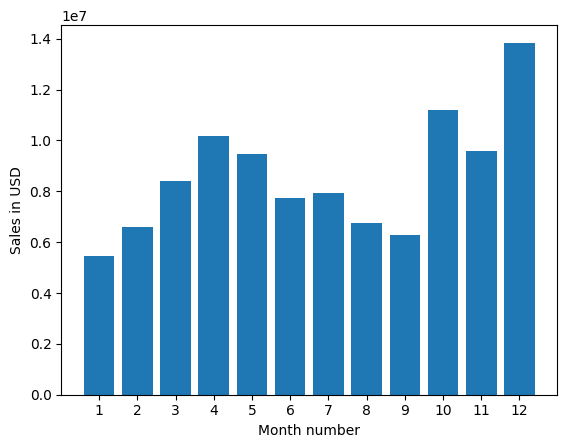

In [25]:
# La visualisation
month=range(1,13)
plt.bar(month,all_data.groupby('Month')['Sales'].sum())
plt.xticks(month)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

**Dans quelle ville nous avons enregistré un maximum de commandes :**

In [26]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95
...,...,...,...,...,...,...,...,...
373695,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",8,99.99
373696,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",8,8.97
373697,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",8,3.84
373698,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",8,11.95


In [27]:
'389 South St, Atlanta, GA 30301'.split(',')[1]

' Atlanta'

In [28]:
def city(x):
  return x.split(',')[1]

In [29]:
all_data['Villes']= all_data['Purchase Address'].apply(city)
all_data

<ipython-input-29-7d767486ab97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Villes']= all_data['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Villes
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle
...,...,...,...,...,...,...,...,...,...
373695,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",8,99.99,San Francisco
373696,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",8,8.97,Boston
373697,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",8,3.84,Seattle
373698,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",8,11.95,San Francisco


In [30]:
all_data['Villes']

0                Atlanta
1                Seattle
2                Atlanta
3                Atlanta
4                Seattle
               ...      
373695     San Francisco
373696            Boston
373697           Seattle
373698     San Francisco
373699       Los Angeles
Name: Villes, Length: 557850, dtype: object

In [31]:
all_data.groupby('Villes')['Villes'].count()

Villes
 Atlanta           44643
 Austin            29715
 Boston            59802
 Dallas            44460
 Los Angeles       88815
 New York City     74628
 Portland          37395
 San Francisco    134196
 Seattle           44196
Name: Villes, dtype: int64

In [32]:
all_data.groupby('Villes')['Villes'].count().values

array([ 44643,  29715,  59802,  44460,  88815,  74628,  37395, 134196,
        44196])

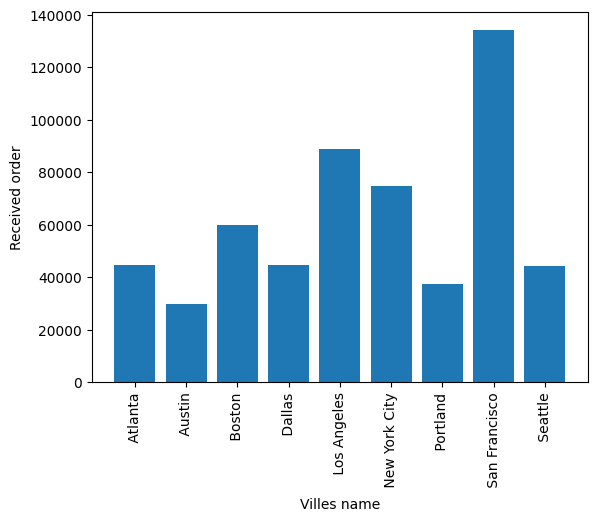

In [33]:
plt.bar(all_data.groupby('Villes')['Villes'].count().index, all_data.groupby('Villes')['Villes'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Received order')
plt.xlabel('Villes name')
plt.show()

**En quel moment doit-on faire une campagne une campagne publicitaire pour avoir plus de ventes ?**

In [34]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

<ipython-input-34-964a8f7a51c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour


In [35]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Villes,Hour
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,16
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,8
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,12
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,10
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,2
...,...,...,...,...,...,...,...,...,...,...
373695,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",8,99.99,San Francisco,22
373696,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",8,8.97,Boston,16
373697,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",8,3.84,Seattle,7
373698,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",8,11.95,San Francisco,12


In [36]:
keys=[]
hours=[]
for key, hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))
hours

[11730,
 7050,
 3729,
 2493,
 2562,
 3963,
 7446,
 12033,
 18768,
 26244,
 32832,
 37233,
 37761,
 36387,
 32952,
 30525,
 31152,
 32697,
 36840,
 38715,
 36684,
 32763,
 26466,
 18825]

Ce résultat correspond au nombre de commandes par heures

Text(0, 0.5, 'nombre des commandes')

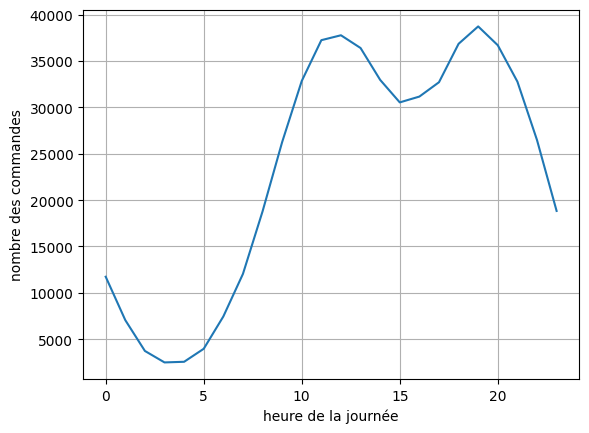

In [37]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('heure de la journée')
plt.ylabel('nombre des commandes')

**Quel produit se vend le plus **

<Axes: xlabel='Product'>

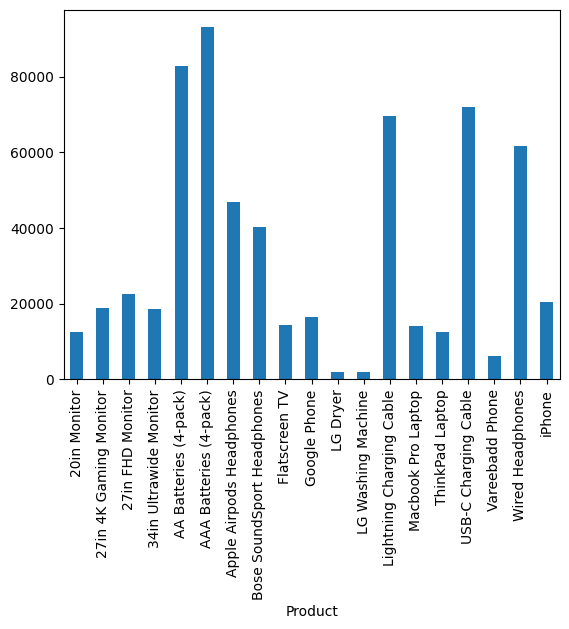

In [38]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [39]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [40]:
products= all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

<ipython-input-41-1cd688f055b2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

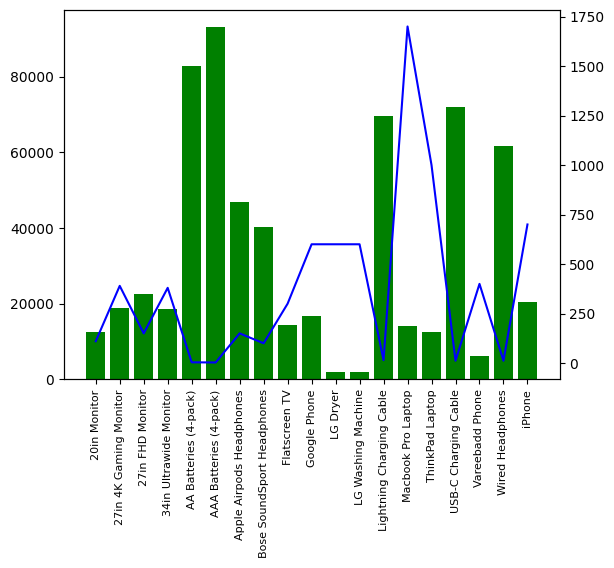

In [41]:
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity,color='g')
ax2.plot(products, prices,'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

**Quelles sont les combinaisons de prix qui se vendent le plus ?**

In [44]:
Df= all_data[all_data['Order ID'].duplicated(keep=False)]

In [47]:
Df['Grouped']=Df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [51]:
Df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Villes,Hour,Grouped
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,16,"Apple Airpods Headphones,Apple Airpods Headpho..."
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,8,"Flatscreen TV,Flatscreen TV,Flatscreen TV"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,12,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,10,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,2,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
...,...,...,...,...,...,...,...,...,...,...,...
373695,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",8,99.99,San Francisco,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
373696,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",8,8.97,Boston,16,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
373697,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",8,3.84,Seattle,7,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
373698,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",8,11.95,San Francisco,12,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [50]:
Df['Grouped']

0         Apple Airpods Headphones,Apple Airpods Headpho...
1                 Flatscreen TV,Flatscreen TV,Flatscreen TV
2         AA Batteries (4-pack),AA Batteries (4-pack),AA...
3         AA Batteries (4-pack),AA Batteries (4-pack),AA...
4         AAA Batteries (4-pack),AAA Batteries (4-pack),...
                                ...                        
373695    Bose SoundSport Headphones,Bose SoundSport Hea...
373696    AAA Batteries (4-pack),AAA Batteries (4-pack),...
373697    AA Batteries (4-pack),AA Batteries (4-pack),AA...
373698    USB-C Charging Cable,USB-C Charging Cable,USB-...
373699    AA Batteries (4-pack),AA Batteries (4-pack),AA...
Name: Grouped, Length: 557850, dtype: object

Supprimer les éléments dupliqués

In [52]:
Df.drop_duplicates(subset=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Villes,Hour,Grouped
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,16,"Apple Airpods Headphones,Apple Airpods Headpho..."
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,8,"Flatscreen TV,Flatscreen TV,Flatscreen TV"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,12,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,10,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,2,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
...,...,...,...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",8,99.99,San Francisco,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",8,8.97,Boston,16,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",8,3.84,Seattle,7,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",8,11.95,San Francisco,12,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [53]:
Df2=Df.drop_duplicates(subset=['Order ID'])

les combainaisons les plus vendues

In [55]:
Df2['Grouped'].value_counts()[0:5]

Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable    19831
AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack)          19826
AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack)             19809
USB-C Charging Cable,USB-C Charging Cable,USB-C Charging Cable                19792
Wired Headphones,Wired Headphones,Wired Headphones                            17208
Name: Grouped, dtype: int64

Representation graphique des combinaisons les plus vendues

<Axes: ylabel='Grouped'>

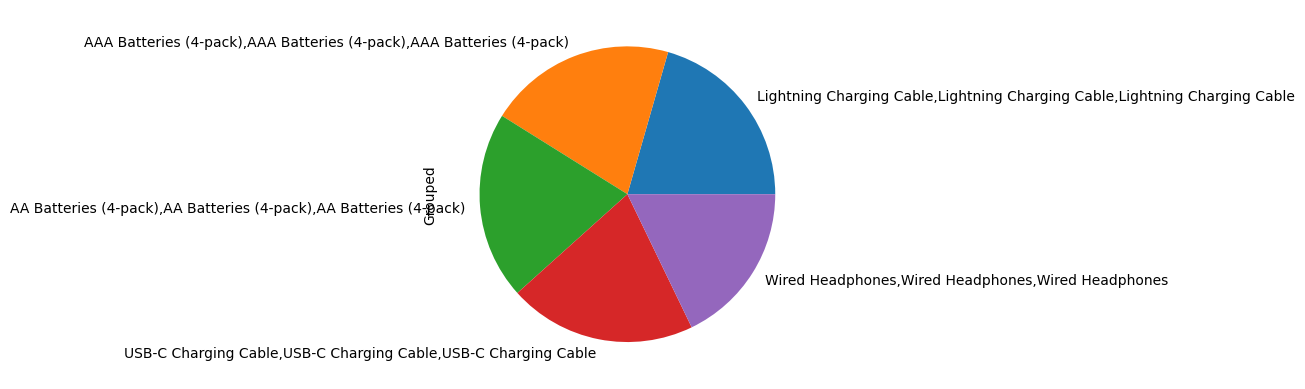

In [57]:
Df2['Grouped'].value_counts()[0:5].plot.pie()